In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences 
#if not work, use the import command in below comments
from keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras import layers
from tensorflow.python.keras import models
from sklearn.preprocessing import LabelEncoder
import matplotlib as plt
from matplotlib import pyplot

# preprocessing the data: remove the punctuation, which has been done by HongTing Zhou
# Read training data and extract question column and answer column
# may need change the import dir
data1 = pd.read_csv(r"Dataset\train_df.csv")
data_val = pd.read_csv(r"Dataset\eval_df.csv")
data = pd.concat([data1, data_val])
#data = pd.read_csv(r"train_df.csv")
question = data.Question
answer = data.Answer
data.ArticleTitle.fillna("empty", inplace=True)


# Tokenizing the sentence, which means break sentence into individual word,
# machine does not understand text, only numbers.
# such as: How are you, tokenize into ["How", "are", "you"]
# Thus, after tokenizing the text, we need to encode the text into numbers
# nltk also has the tokenizing feature, the code is nltk.word_tokenize()
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(question)
tokenized_question = tokenizer.texts_to_sequences(question)

# applying padding to have consiste column size in each
padded_question = pad_sequences(tokenized_question)

# so convert text y to numerical y
skl_encoder = LabelEncoder()
encoded_answer = skl_encoder.fit_transform(answer)


input_shape = padded_question.shape[1]

# determine nunber of unique words 
num_unique_words = len(tokenizer.word_index)


#determine encoded answer length
output_length = skl_encoder.classes_.shape[0]


# Build the model using LSTM
encoder_input = layers.Input(shape=(input_shape,))
encoder_embedding = layers.Embedding(num_unique_words+1, 15)(encoder_input)
encoder_LSTM = layers.LSTM(20, dropout=0.5, return_sequences=True)(encoder_embedding)
encoder_flatten = layers.Flatten()(encoder_LSTM)
encoder_output = layers.Dense(num_unique_words+1, activation="softmax")(encoder_flatten)
model = models.Model(encoder_input, encoder_output)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
trained_model = model.fit(padded_question, encoded_answer, epochs=100, validation_split=0.2)



: 

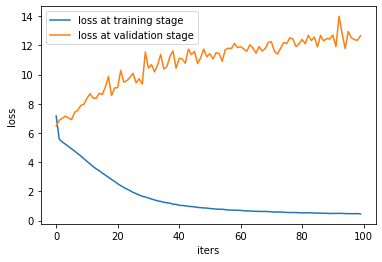

In [10]:
#plot the loss

plt.pyplot.plot(trained_model.history["loss"], label="loss at training stage")
plt.pyplot.plot(trained_model.history["val_loss"], label="loss at validation stage")
plt.pyplot.xlabel('iters')
plt.pyplot.ylabel('loss')
plt.pyplot.legend()

plt.pyplot.savefig(r'LSTM loss.png',dpi=600,bbox_inches = 'tight') # may need change the export path

In [3]:
# test the model by ask new answers

def get_answer(q):

  # getting response from testing data
  question_input = [q]

  # tokenize the question and encoded it
  tokenized_input = tokenizer.texts_to_sequences(question_input)
  paddedded_question_input = pad_sequences(tokenized_input, input_shape)
  prediction_input = np.array(paddedded_question_input)
  output = model.predict(prediction_input)
  output = output.argmax()
  out_answer = skl_encoder.inverse_transform([output])

  return out_answer[0]

q = "does londons population draw from a wide range of religions"
a = get_answer(q)
print(a)

yes they do tend to have darker furs


In [6]:
# export the test result
test_data = pd.read_csv(r"Dataset\test_df.csv")
test_question = test_data.Question
test_answer = test_data.Answer
predicted_answer = []
for i, q in test_question.items():
  a = get_answer(q)
  predicted_answer.append(a)

predicted_answer = pd.DataFrame(predicted_answer, columns=["Predictive Answer"])

to_csv = pd.concat([test_question, test_answer, predicted_answer], axis=1)
# print(to_csv)
print(to_csv)
to_csv.to_csv(r"LSTM_output.csv")

                                              Question  \
0    did singapores standard of living decrease sin...   
1                      did the mughals arrive in dhaka   
2                who did cleveland run against in 1884   
3                  what is the biggest city in finland   
4    how many days did it take the imperial japanes...   
..                                                 ...   
439                      did wilsons father own slaves   
440            are gray wolves native to north america   
441          in what country did fox hunting originate   
442             what is the cause of local earthquakes   
443      he discovered an inverse relationship of what   

                                                Answer  \
0                                                   no   
1                                                  yes   
2                                       james g blaine   
3                                     greater helsinki   
4            